# 데크(Deque)

- Double-Ended Queue의 줄임말
- 큐와 스택의 특징과 연산을 모두 갖고 있는 복합 자료형. 양쪽 끝을 모두 추출 할 수 있는, 큐를 일반화한 형태의 추상 자료형(ADT)이다.
- 파이썬에서는 collections 모듈의 deque로 지원

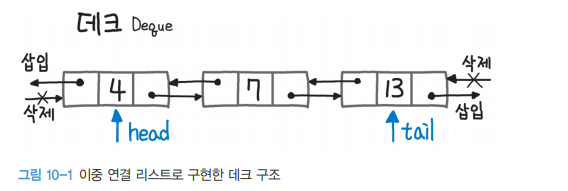


In [4]:
import collections

d = collections.deque()
type(d)

collections.deque

# Q26. 원형 데크 디자인


다음 연산을 제공하는 원형 데크를 디자인하라.

- MyCircularDeque(k) : 데크사이즈 k로 지정
- insertFront()      : 데크 처음에 아이템을 추가하고, 성공할 경우 true 리턴
- insertLast()       : 데크 마지막에 아이템을 추가하고, 성공할 경우 true 리턴
- deleteFront()      : 데크 처음에 아이템을 삭제하고, 성공할 경우 true 리턴
- deleteLast()       : 데크 처음에 아이템을 삭제하고, 성공할 경우 true 리턴
- getFront()         : 데크의 첫번째 아이템을 가져오고, 데크가 비어있다면 -1 리턴    
- getRear()          : 데크의 마지막 아이템을 가져오고, 데크가 비어있다면 -1 
- isEmpty()          : 데크가 비어있다면 true 리턴
- isFull()           : 데크가 가득 차있다면 true 리턴

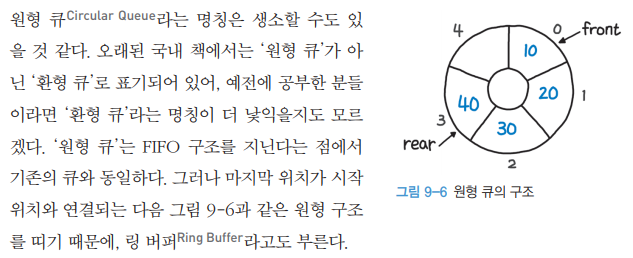

## A_1. 이중 연결 리스트를 이용한 데크 구현

- 원형 데크를 이중 연결 리스트로 구현하게 되면 원형의 이점을 살릴수 없음
- 원형으로 구현하는 이유는 공간이 다 찼을 때 앞쪽의 빈 공간을 사용하려는 의도. 하지만 연결 리스트는 빈 공간이라는 개념이 존재하지 않는다.

In [38]:
# Definition for singly-linked list.
class ListNode(object):
     def __init__(self, x):
         self.val = x
         self.next = None

In [47]:
class MyCircularDeque:
  def __int__(self, k):
    self.head, self.tail = ListNode(None), ListNode(None)
    self.k, self.len = k, 0
    self.head.right, self.head.left = self.tail, self.head

  #새로운 노드를 끼워넣기
  def _add(self, node: ListNode, new: ListNode):
    n = node.right
    node.right = new
    new.left, new.right = node, n
    n.left = new

  #다음 노드 삭제하기
  def _del(self, node: ListNode):
    n = node.right.right
    node.right = n
    n.left = node

  def insertFront(self, value: int) -> bool:
    if self.len == self.k:
      return False
    self.len +=1
    self._add(self.head, ListNode(value))
    return True

  def insertLast(self, value: int) -> bool:
    if self.len == self.k:
      return False
    self.len += 1
    self._add(self.tail.left, ListNode(value))
    return True

  def deleteFront(self) -> bool:
    if self.len == 0:
      return False
    self.len -= 1
    self._del(self.head)
    return True

  def deleteLast(self) -> bool:
    if self.len == 0:
      return False
    self.len -= 1
    self._del(self.tail.left.left)
    return True

  def getFront(self) -> int:
    return self.head.right.val if self.len else -1

  def getRear(self) -> int:
    return self.tail.left.val if self.len else -1       

  def isEmpty(self) -> bool:
    return self.len == 0

  def isFull(self) -> bool:
    return self.len == self.k              

# 우선순위 큐

- 특정 조건에 따라 우선순위가 가장 높은 요소가 추출되는 자료형(ex 최댓값)
- 큐 또는 스택과 같은 추상 자료형과 유사하지만 추가로 각 요소의 '우선순위'와 연결돼 있다.
- 요소를 정렬하는데 *S(n)*의 시간이 든다고 할 때, 우선순위 큐에 새 요소를 삽입하거나 삭제하는데는 *O(S(n))*이 소요. 하지만 최댓값을 가져오는데는 맨 앞의 값을 가져오기만 하면 되므로 *O(1)*로 가능.
- 힙 정렬등의 효율적인 방법을 통해 일반적인 *O(nlogn)*보다 적게 소요되도록 함.

## Q.27 k개 정렬 리스트 병합

k 개의 정렬된 리스트를 1개의 정렬된 리스트로 병합하라

- 입력
[1->4->5, 1->3->4, 2->6]

- 출력
1->1->2->3->4->4->5->6

## A_1. 우선순위 큐를 이용한 리스트 병합

- 파이썬의 heapq 모듈 사용
- heapq 모듈은 이진 트리 기반의 최소 힙 자료구조를 제공. 
- min heap을 사용하면 원소들이 항상 정렬된 상태로 추가되고 삭제되며, 가장 작은값은 언제나 인덱스 0, 즉 이진 트리의 루트에 위치. 내부적으로 min heap 내의 모든 원소(k)는 항상 자식 원소들(2k+1, 2k+2) 보다 크기가 작거나 같도록 원소가 추가되고 삭제됨

## heap 모듈

In [50]:
import heapq

heap = []

heapq.heappush(heap, 4)
heapq.heappush(heap, 1)
heapq.heappush(heap, 7)
heapq.heappush(heap, 3)
print(heap)

[1, 3, 7, 4]


바로 힙에 튜플(tuple)를 원소로 추가하거나 삭제하면, 튜플 내에서 맨 앞에 있는 값을 기준으로 최소 힙이 구성된다

In [58]:
import heapq

heap = []

heapq.heappush(heap, (1,4,5))
heapq.heappush(heap, (1,2,3))

print(heap)

[(1, 2, 3), (1, 4, 5)]


In [52]:
print(heapq.heappop(heap))
print(heap)

3
[4, 7]


In [55]:
def heap_sort(nums):
  heap = []
  for num in nums:
    heapq.heappush(heap, num)
    print(heap)
  
  sorted_nums = []
  while heap:
    sorted_nums.append(heapq.heappop(heap))
  return sorted_nums

print(heap_sort([4, 1, 7, 3, 8, 5]))

[4]
[1, 4]
[1, 4, 7]
[1, 3, 7, 4]
[1, 3, 7, 4, 8]
[1, 3, 5, 4, 8, 7]
[1, 3, 4, 5, 7, 8]


## 해답 코드

In [ ]:
def mergeKLists(self, lists : List[ListNode]) -> ListNode:
  root = result  = ListNode(None)
  heap = []

  #for lst in lists:
     #heapq.heaqppush(heap,(lst.val, lst))

  for i in range(len(lists)):
    if lists[i]:
      heapq.headppush(heap, (lists[i].val, i, lists[i]))

  while heap:
    #heap에서 작은것부터 추출하는 과정
    node = heapq.heappop(heap)
    idx = node[1]
    result.next = node[2]
    
    #다시 heap에 추가하는 과정
    result = result.next
    if result.next:
      heapq.heappush(heap, (result.next.val, idx, result.next))

  return root.next        